In [ ]:
import numpy as np
import math


def shrink_quadrilateral(v1, v2, v3, v4, margin):
    # xxx
    # Calculate the centroid of the quadrilateral
    centroid = np.mean([v1, v2, v3, v4], axis=0)
    
    # Define a function to move a point towards the centroid by a given margin
    def move_point_towards_centroid(point, centroid, margin):
        # Calculate the direction vector from the point to the centroid
        direction_vector = centroid - point
        # Normalize the direction vector
        norm = np.linalg.norm(direction_vector)
        if norm == 0:
            return point  # In case the point is already at the centroid
        normalized_direction_vector = direction_vector / norm
        # Calculate the new point that is 'margin' distance closer to the centroid
        new_point = point + margin * normalized_direction_vector
        return new_point
    
    # Move each vertex towards the centroid by the margin
    new_v1 = move_point_towards_centroid(v1, centroid, margin)
    new_v2 = move_point_towards_centroid(v2, centroid, margin)
    new_v3 = move_point_towards_centroid(v3, centroid, margin)
    new_v4 = move_point_towards_centroid(v4, centroid, margin)
    
    return new_v1, new_v2, new_v3, new_v4


In [1]:
# import numpy as np
# import math

# def shrink_triangle(v1, v2, v3, margin):
#     # Calculate the centroid of the triangle
#     centroid = np.mean([v1, v2, v3], axis=0)
    
#     # Define a function to move a point towards the centroid by a given margin
#     def move_point_towards_centroid(point, centroid, margin):
#         # Calculate the direction vector from the point to the centroid
#         direction_vector = centroid - point
#         # Normalize the direction vector
#         norm = np.linalg.norm(direction_vector)
#         if norm == 0:
#             return point  # In case the point is already at the centroid
#         normalized_direction_vector = direction_vector / norm
#         # Calculate the new point that is 'margin' distance closer to the centroid
#         new_point = point + margin * normalized_direction_vector
#         return new_point
    
#     # Move each vertex towards the centroid by the margin
#     new_v1 = move_point_towards_centroid(v1, centroid, margin)
#     new_v2 = move_point_towards_centroid(v2, centroid, margin)
#     new_v3 = move_point_towards_centroid(v3, centroid, margin)
    
#     return new_v1, new_v2, new_v3

# Example usage:
vertex1 = np.array([0, 0])
vertex2 = np.array([200, 0])
vertex3 = np.array([100, 100])
vertex4 = np.array([300,150])
margin = 0.1  # Example margin

shrinked_v1, shrinked_v2, shrinked_v3, shrinked_v4= shrink_quadrilateral(vertex1, vertex2, vertex3, vertex4, margin)

In [2]:
import numpy as np
import math

# def getRandomSamples(x0, y0, x1, y1, x2, y2, n_points):
#     # Coordinates of the triangle's vertices
#     point0 = np.array([x0, y0])
#     point1 = np.array([x1, y1])
#     point2 = np.array([x2, y2])
    
#     # Vectors from point 0 to point 1 and from point 0 to point 2
#     e0 = point1 - point0
#     e1 = point2 - point0
    
#     # List to store the random points
#     randomPoints = []
    
#     for _ in range(n_points):
#         # Generate random x, y in the range [0, 1]
#         x, y = np.random.rand(2)
#         # Ensure the random point (x, y) lies within the triangle
#         if x + y > 1:
#             x = 1 - x
#             y = 1 - y

#         # Calculate a random point within the triangle
#         randomPoint = point0 + e0 * x + e1 * y
#         randomPoints.append(randomPoint)
    
#     return randomPoints

import numpy as np

def getRandomSamplesInQuadrilateral(x0, y0, x1, y1, x2, y2, x3, y3, n_points):
    # Coordinates of the quadrilateral's vertices
    point0 = np.array([x0, y0])
    point1 = np.array([x1, y1])
    point2 = np.array([x2, y2])
    point3 = np.array([x3, y3])
    
    # Divide the quadrilateral into two triangles:
    # Triangle 1: point0, point1, point2
    # Triangle 2: point2, point3, point0
    
    # List to store the random points
    randomPoints = []
    
    for _ in range(n_points):
        # Randomly choose one of the two triangles to place a point
        if np.random.rand() < 0.5:
            # Working with triangle 1 (point0, point1, point2)
            base_point = point0
            edge0 = point1 - point0
            edge1 = point2 - point0
        else:
            # Working with triangle 2 (point2, point3, point0)
            base_point = point2
            edge0 = point3 - point2
            edge1 = point0 - point2
            
        # Generate random x, y in the range [0, 1]
        x, y = np.random.rand(2)
        # Ensure the random point (x, y) lies within the triangle
        if x + y > 1:
            x = 1 - x
            y = 1 - y

        # Calculate a random point within the selected triangle
        randomPoint = base_point + edge0 * x + edge1 * y
        randomPoints.append(randomPoint)
    
    return randomPoints


n_points = 500000  # Number of random points to generate
coordinates = getRandomSamplesInQuadrilateral(shrinked_v1[0], shrinked_v1[1], 
                               shrinked_v2[0], shrinked_v2[1], 
                               shrinked_v3[0], shrinked_v3[1], 
                               shrinked_v4[0], shrinked_v4[1],
                               n_points)
coordinates = np.vstack(coordinates)
coordinates

array([[136.95611465,  32.70172638],
       [104.01960101,  20.65094653],
       [117.59770551,  74.23091578],
       ...,
       [ 75.60551224,  48.7275099 ],
       [112.7758369 ,  11.14041541],
       [ 15.09408107,   0.82416818]])

In [3]:
#随机生成坐标值
# Redefine the ranges and step size
# x_range = (90.05, 105.7)
# y_range = (40.05, 55.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# # Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T
# coordinates.size

In [4]:
#随机生成坐标值
# Redefine the ranges and step size
# x_range = (90.05, 105.7)
# y_range = (40.05, 55.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T

# Generate random distances in the range (0.0, 0.05)
random_distances = np.random.uniform(0.0, 0.05, size=(len(coordinates),))

# Generate random angles in the range (0, 2*pi)
random_angles = np.random.uniform(0, 2*np.pi, size=(len(coordinates),))

# Convert polar coordinates to cartesian coordinates for the second point
delta_x = random_distances * np.cos(random_angles)
delta_y = random_distances * np.sin(random_angles)

# Create the second set of coordinates
new_x_values = coordinates[:, 0] + delta_x
new_y_values = coordinates[:, 1] + delta_y

# Combine the original and new coordinates to form a 4D vector
result_array = np.column_stack(
   (coordinates[:, 0], coordinates[:, 1], new_x_values, new_y_values))

result_array = result_array.reshape((len(coordinates), 4))

result_array.shape
result_array


array([[136.95611465,  32.70172638, 136.9551506 ,  32.70106426],
       [104.01960101,  20.65094653, 104.02575986,  20.6432731 ],
       [117.59770551,  74.23091578, 117.59660051,  74.22628649],
       ...,
       [ 75.60551224,  48.7275099 ,  75.56029851,  48.74641981],
       [112.7758369 ,  11.14041541, 112.76330596,  11.11568662],
       [ 15.09408107,   0.82416818,  15.04486343,   0.82576495]])

In [5]:

formatted_array_A = np.array(list(zip(coordinates[:, 0], coordinates[:, 1])))
formatted_array_B = np.array(list(zip(new_x_values, new_y_values)))

formatted_array_A, formatted_array_B

(array([[136.95611465,  32.70172638],
        [104.01960101,  20.65094653],
        [117.59770551,  74.23091578],
        ...,
        [ 75.60551224,  48.7275099 ],
        [112.7758369 ,  11.14041541],
        [ 15.09408107,   0.82416818]]),
 array([[136.9551506 ,  32.70106426],
        [104.02575986,  20.6432731 ],
        [117.59660051,  74.22628649],
        ...,
        [ 75.56029851,  48.74641981],
        [112.76330596,  11.11568662],
        [ 15.04486343,   0.82576495]]))

In [6]:
import numpy as np


def calculate_distance(x, y, a, b):
    """Calculate the Euclidean distance between two points (x, y) and (a, b)."""
    return math.sqrt((a - x) ** 2 + (b - y) ** 2)

# 定义计算两点之间距离的函数
# def calculate_distance1(p1, p2):
#     return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 定义计算夹角的函数，以计算与x轴的夹角
def calculate_angle_with_x_axis(x, y, a, b):
    # 向量p1p2
    vector = np.array([a - x, b -y])
    # x轴正方向的向量
    x_axis = np.array([1, 0])
    
    # 向量的点乘
    dot_product = np.dot(vector, x_axis)
    # 向量的模长
    norm_vector = np.linalg.norm(vector)
    
    # 防止除以零
    if norm_vector == 0:
        return 0
    
    # 计算夹角的余弦值
    cos_angle = dot_product / norm_vector
    # 余弦值的范围是[-1, 1]，可能由于浮点数误差超出这个范围
    # 这里将其限制在[-1, 1]内
    cos_angle = np.clip(cos_angle, -1, 1)
    
    # 计算夹角（弧度转换为度）
    angle = np.arccos(cos_angle)
    angle_degrees = np.degrees(angle)
    
    # 考虑向量在y轴上的方向，如果向量第二个分量是负的，则它在x轴的下方，夹角应该是360°-计算出的角度
    if vector[1] < 0:
        angle_degrees = 360 - angle_degrees
    
    return angle_degrees


# 继续使用之前定义的点和距离计算方法

# # 坐标定义
# O1 = np.array([0, 0])
# O2 = np.array([0, 200])
# O3 = np.array([100, 100])

x1, y1 = np.array([50, 50]) # 假设的坐标，需要实际输入
x2, y2 = np.array([150, 150]) # 假设的坐标，需要实际输入

o1a = []
o1b = []
o2a = []
o2b = []
o3a = []
o3b = []

theta_1a = []
theta_1b = []
theta_2a = []
theta_2b = []
theta_3a = []
theta_3b = []

for i in range(0, n_points):
    aPosition = formatted_array_A[i]
    bPosition = formatted_array_B[i]
    
    # 计算距离
    o1a.append(calculate_distance(vertex1[0], vertex1[1], aPosition[0], aPosition[1]))
    o1b.append(calculate_distance(vertex1[0], vertex1[1], bPosition[0], bPosition[1]))
    o2a.append(calculate_distance(vertex2[0], vertex2[1], aPosition[0], aPosition[1]))
    o2b.append(calculate_distance(vertex2[0], vertex2[1], bPosition[0], bPosition[1]))
    o3a.append(calculate_distance(vertex3[0], vertex3[1], aPosition[0], aPosition[1]))
    o3b.append(calculate_distance(vertex3[0], vertex3[1], bPosition[0], bPosition[1]))


    # 计算夹角
    theta_1a.append(calculate_angle_with_x_axis(vertex1[0], vertex1[1], aPosition[0], aPosition[1]))
    theta_1b.append(calculate_angle_with_x_axis(vertex1[0], vertex1[1], bPosition[0], bPosition[1]))
    theta_2a.append(calculate_angle_with_x_axis(vertex2[0], vertex2[1], aPosition[0], aPosition[1]))
    theta_2b.append(calculate_angle_with_x_axis(vertex2[0], vertex2[1], bPosition[0], bPosition[1]))
    theta_3a.append(calculate_angle_with_x_axis(vertex3[0], vertex3[1], aPosition[0], aPosition[1]))
    theta_3b.append(calculate_angle_with_x_axis(vertex3[0], vertex3[1], bPosition[0], bPosition[1]))

result_array_final = np.column_stack(
   (o1a, o1b, o2a, o2b, o3a, o3b, theta_1a, theta_1b, theta_2a, theta_2b, theta_3a, theta_3b))


In [7]:
import random
w = np.zeros([n_points,2])
v = np.zeros([n_points,2])
for i in range(n_points):
    x = result_array[i][0]
    y = result_array[i][1]
    x1 = result_array[i][2]
    y1 = result_array[i][3]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    w12 = 2*6*10e9*3.14*dd12/(3*10e8)
    w13 = 2*6*10e9*3.14*dd13/(3*10e8)
    v12 = (6*10e9/(3*10e8))*dd12*100
    v13 = (6*10e9/(3*10e8))*dd13*100
    w[i][0] = w12
    w[i][1] = w13
    v[i][0] = v12
    v[i][1] = v13

In [8]:
w

array([[0.06789483, 0.12247568],
       [0.38783462, 1.57282217],
       [0.71375361, 0.02580437],
       ...,
       [2.66835458, 3.187804  ],
       [0.70309755, 0.97922857],
       [0.02103827, 2.29293225]])

In [9]:
v

array([[ 1.08112781,  1.95024962],
       [ 6.17571051, 25.04493899],
       [11.36550341,  0.41089754],
       ...,
       [42.48972253, 50.76121015],
       [11.19582094, 15.59281155],
       [ 0.3350043 , 36.51165999]])

In [10]:
import numpy as np

def generate_modified_complex_curve():
    # 生成横坐标在90到105之间的点
    x_values = np.arange(90, 105, 0.01)

    # 生成复杂的纵坐标点
    y_values = (
        42 + 10 * np.sin((x_values - 90) / 5) +
        5 * np.cos((x_values - 95) / 5) +
        3 * np.sin((x_values - 100) / 2) +
        2 * np.exp((x_values - 105) / 10) +
        2 * np.sin((x_values - 95) / 2) * np.cos((x_values - 100) / 5)
    )

    # 保证相邻点之间的距离小于0.05
    x_points = []
    y_points = []

    for i in range(len(x_values) - 1):
        x_points.append(x_values[i])
        y_points.append(y_values[i])

        # 计算当前点与下一个点之间的距离
        distance = np.sqrt((x_values[i + 1] - x_values[i]) ** 2 + (y_values[i + 1] - y_values[i]) ** 2)

        # 如果距离大于0.05，则插入新点，使距离小于0.05
        while distance > 0.1:
            x_new = (x_values[i] + x_values[i + 1]) / 2
            y_new = (y_values[i] + y_values[i + 1]) / 2

            x_points.append(x_new)
            y_points.append(y_new)

            distance = np.sqrt((x_values[i + 1] - x_new) ** 2 + (y_values[i + 1] - y_new) ** 2)

    return x_points, y_points

# 获取采样点
x_points, y_points = generate_modified_complex_curve()


In [11]:
result_test = np.zeros([len(x_points)-1,4])
for i in range(len(x_points)-2):
    result_test[i][0]=x_points[i]
    result_test[i][1]=y_points[i]
    result_test[i][2]=x_points[i+1]
    result_test[i][3]=y_points[i+1]

In [12]:
import random
inputs_t = np.zeros([len(x_points)-1,4])
for i in range(len(x_points)-2):
    x = result_test[i][0]
    y = result_test[i][1]
    x1 = result_test[i][2]
    y1 = result_test[i][3]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    w12 = 2*6*10e9*3.14*dd12/(3*10e8)
    w13 = 2*6*10e9*3.14*dd13/(3*10e8)
    v12 = (6*10e9/(3*10e8))*dd12*100
    v13 = (6*10e9/(3*10e8))*dd13*100
    inputs_t[i][0] = w12
    inputs_t[i][1] = w13
    inputs_t[i][2] = v12
    inputs_t[i][3] = v13

In [13]:
import torch.nn as nn

def pointInTriangle(pt, v1, v2, v3):
    # Barycentric coordinates method
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0

    return ((b1 == b2) and (b2 == b3))

# def triangleConstraintLoss(outputs, targets, v1, v2, v3):
#     criterion = nn.MSELoss()
    
#     # 计算常规损失
#     mse_loss = criterion(outputs, targets)
    
#     # 计算三角形约束损失
#     constraint_loss = 0.0
#     for output in outputs:
#         # 如果点不在三角形内，增加损失
#         if not pointInTriangle(output, v1, v2, v3):
#             constraint_loss += 100.0

#     # 总损失是常规损失和约束损失的和
#     total_loss = mse_loss + constraint_loss
#     return total_loss

def triangleConstraintLoss(outputs, targets, v1, v2, v3):
    criterion = nn.MSELoss()
    
    print(outputs.shape)
    
    # 计算常规损失
    mse_loss = criterion(outputs, targets)
    
    # # 计算三角形约束损失
    # constraint_loss = 0.0
    # for output in outputs:
    #     # 如果点不在三角形内，增加损失
    #     if not pointInTriangle(output, v1, v2, v3):
    #         constraint_loss += 100.0

    # # 总损失是常规损失和约束损失的和
    # total_loss = mse_loss + constraint_loss

    d11 = outputs[0]
    abs()
    return total_loss


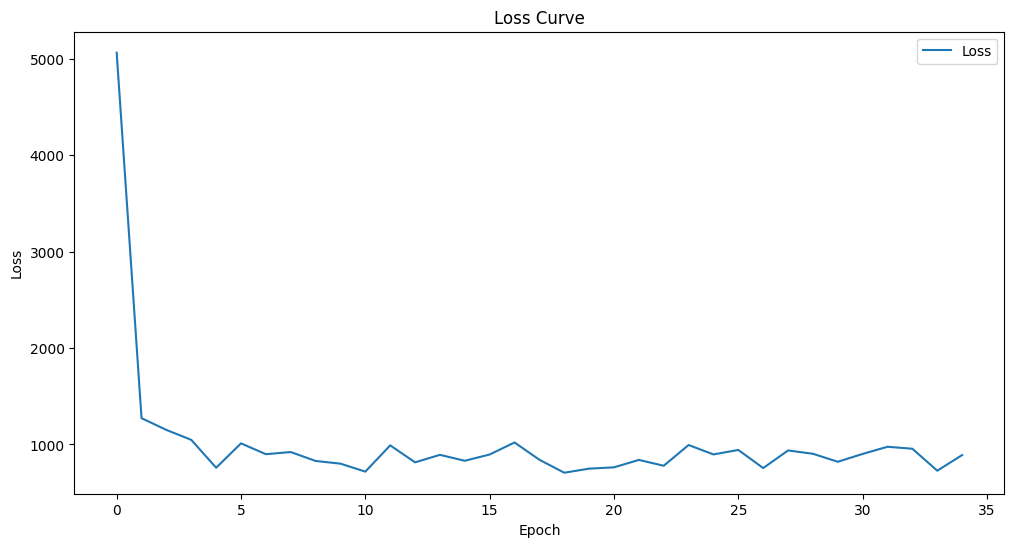

Epoch [35/150], Loss: 889.4112548828125


: 

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from IPython.display import clear_output


# 数据预处理
inputs = np.concatenate((w, v), axis=1)  # 将 w 和 v 拼接
inputs_train, inputs_test, coords_train, coords_test = train_test_split(inputs, result_array_final, test_size=0.05, random_state=42)
inputs_test = inputs_t
coords_test = result_test
# 定义一个 PyTorch 数据集
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]
# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义更深的神经网络模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 512)  # 新增层
        self.fc5 = nn.Linear(512, 512)  # 新增层
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(128, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 12)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.tanh(self.fc4(x))  # 新增层
        x = self.tanh(self.fc5(x))  # 新增层
        x = self.tanh(self.fc6(x))
        x = self.tanh(self.fc7(x))
        x = self.tanh(self.fc8(x))
        x = self.tanh(self.fc9(x))
        x = self.fc10(x)
        return x

# 使用GPU加速
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN().to(device)

# 损失函数和优化器
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

# 训练模型
epochs = 150
loss_values = []  # 存储损失值以供绘图

for epoch in range(epochs):
    for inputs, coords in train_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())

    # 动态绘图
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # 打印损失信息
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# 测试模型
# model.eval()
# total_test_loss = 0
# predicted_coords = []
# true_coords = []
# with torch.no_grad():
#     for inputs, coords in test_loader:
#         inputs, coords = inputs.to(device), coords.to(device)
#         outputs = model(inputs)
#         test_loss = triangleConstraintLoss(outputs, coords)
#         total_test_loss += test_loss.item()
#         predicted_coords.append(outputs.cpu().numpy())
#         true_coords.append(coords.cpu().numpy())

# # 合并所有批次的预测结果和真实值
# predicted_coords = np.concatenate(predicted_coords, axis=0)
# true_coords = np.concatenate(true_coords, axis=0)
# # 绘制散点图
# plt.figure(figsize=(10, 6))
# plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
# plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.legend()
# plt.title('True vs. Predicted Coordinates')
# plt.grid(True)
# plt.show()
# print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
# # 测试模型
# model.eval()
# total_test_loss = 0
# predicted_coords = []
# true_coords = []
# with torch.no_grad():
#     for inputs, coords in test_loader:
#         inputs, coords = inputs.to(device), coords.to(device)
#         outputs = model(inputs)
#         test_loss = triangleConstraintLoss(outputs, coords, vertex1, vertex2, vertex3)
#         total_test_loss += test_loss.item()
#         predicted_coords.append(outputs.cpu().numpy())
#         true_coords.append(coords.cpu().numpy())

# # 合并所有批次的预测结果和真实值
# predicted_coords = np.concatenate(predicted_coords, axis=0)
# true_coords = np.concatenate(true_coords, axis=0)
# # 绘制散点图
# plt.figure(figsize=(10, 6))
# plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
# plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.legend()
# plt.title('True vs. Predicted Coordinates')
# plt.grid(True)
# plt.show()
# print(f'Test Loss: {total_test_loss / len(test_loader)}')

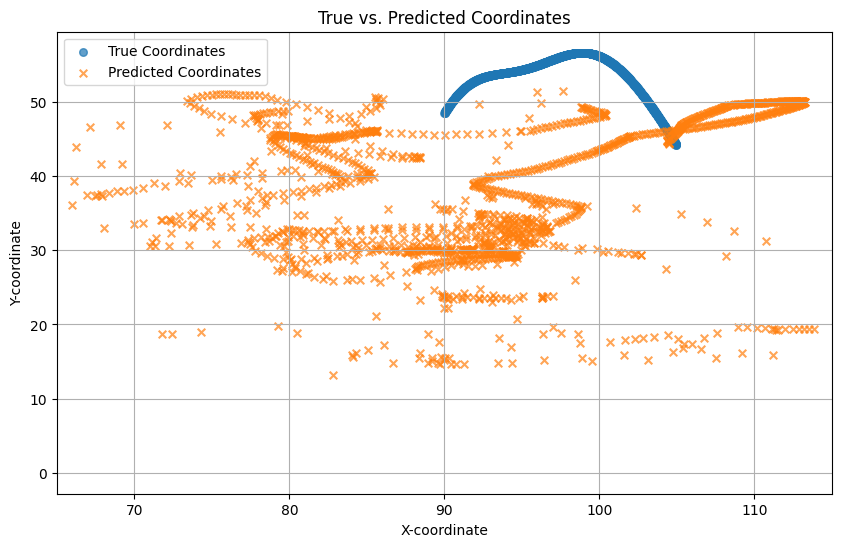

Test Loss: 958.700892560184


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.xlim(65,115)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt


# 数据预处理
inputs = np.concatenate((w, v), axis=1)  # 将 w 和 v 拼接
inputs_train, inputs_test, coords_train, coords_test = train_test_split(inputs, result_array, test_size=0.5, random_state=42)
inputs_test = inputs_t
coords_test = result_test
# 定义一个 PyTorch 数据集
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]
# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 定义更深的神经网络模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 512)  # 新增层
        self.fc5 = nn.Linear(512, 512)  # 新增层
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(128, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 4)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))  # 新增层
        x = self.relu(self.fc5(x))  # 新增层
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.fc10(x)
        return x

# 使用GPU加速
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN().to(device)

#考虑约束关系
#两个接收机的圆相交点
#计算A点和B点的距离差






[
    
]
#分段训练 10000个点 收敛 学习率降低 步长变短 
#增加数据点


# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)

# 训练模型
epochs = 1500
for epoch in range(epochs):
    for inputs, coords in train_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# 测试模型
model.eval()
total_test_loss = 0
predicted_coords = []
true_coords = []
with torch.no_grad():
    for inputs, coords in test_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        outputs = model(inputs)
        test_loss = criterion(outputs, coords)
        total_test_loss += test_loss.item()
        predicted_coords.append(outputs.cpu().numpy())
        true_coords.append(coords.cpu().numpy())

# 合并所有批次的预测结果和真实值
predicted_coords = np.concatenate(predicted_coords, axis=0)
true_coords = np.concatenate(true_coords, axis=0)
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

Epoch [1/1500], Loss: 1072.650390625
Epoch [2/1500], Loss: 795.63720703125
Epoch [3/1500], Loss: 768.9146728515625
Epoch [4/1500], Loss: 584.3387451171875
Epoch [5/1500], Loss: 910.12255859375
Epoch [6/1500], Loss: 905.2374267578125
Epoch [7/1500], Loss: 1028.7579345703125
Epoch [8/1500], Loss: 737.1422119140625
Epoch [9/1500], Loss: 828.8736572265625
Epoch [10/1500], Loss: 492.4371643066406
Epoch [11/1500], Loss: 903.3421630859375
Epoch [12/1500], Loss: 1395.203369140625
Epoch [13/1500], Loss: 683.542724609375
Epoch [14/1500], Loss: 730.0942993164062
Epoch [15/1500], Loss: 567.9947509765625
Epoch [16/1500], Loss: 705.3511962890625
Epoch [17/1500], Loss: 501.4150085449219
Epoch [18/1500], Loss: 729.8399658203125
Epoch [19/1500], Loss: 1746.5870361328125
Epoch [20/1500], Loss: 580.0055541992188
Epoch [21/1500], Loss: 832.3045043945312
Epoch [22/1500], Loss: 537.3626708984375
Epoch [23/1500], Loss: 742.3004150390625
Epoch [24/1500], Loss: 605.3677368164062
Epoch [25/1500], Loss: 1219.261

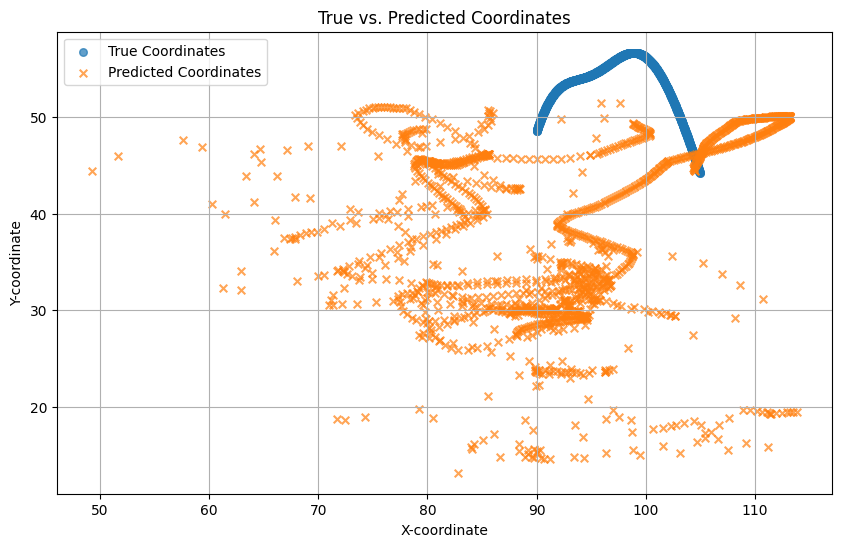

Test Loss: 244.77469597281294


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:1497, 0], true_coords[:1497, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:1497, 0], predicted_coords[:1497, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
d1 = 0
d2 = 0
for i in range(len(true_coords)-1):
    x = true_coords[i, 0]
    y = true_coords[i, 1]
    x1 = predicted_coords[i, 0]
    y1 = predicted_coords[i, 1]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    d1 = d1+dd12
    d2 = d2+dd13

In [ ]:
d2/len(true_coords)

7.759300610265623